# Car vs. Train Travel to Delft: Comparative Study

## 1. Motivation & introduction
Transportation choices significantly impact students’ daily lives, particularly those commuting to Delft without access to free public transportation. This study examines whether owning and using a private car is a worthwhile alternative to traveling by train for such students. By comparing both modes of transport in terms of cost and travel time, during weekday peak hours. The project aims to provide data-driven insights that can help students make informed commuting decisions. Ultimately, this comparative analysis seeks to identify under what conditions car travel becomes more or less advantageous than using the train for regular journeys to Delft.


## 2. Research Questions

**Objectives**

This study aims to evaluate whether students without access to free public transportation would benefit from owning and using a car for commuting to Delft. Specifically, the objectives are to:
- Quantify and compare the costs of commuting to Delft by car and by train. 
- Quantify and compare the travel times of these two modalities, including the influence of peak-hours.
- Identify the commuting threshold at which train travel becomes more cost-effective or time-efficient than car ownership.  
- Provide insights that help students make an informed decision regarding the choice between car and train for commuting to Delft.

To address these objectives, the study focuses on the following research questions:

**Main Research Question**  
How do travel costs and travel times compare between private car use and train travel for commuting from major Dutch cities to Delft during weekday peak hours?  

**Sub-questions**  
1. What are the main cost components of commuting by car and by train, and how do these compare per month?  
2. At what commuting distance or threshold does train travel become more cost-effective than car ownership or vice versa?  
3. How does travel time differ between car and train, taking into account peak-hour road congestion and train disruptions?     
4. How do changes in ticket price affect the comparative outcomes?   

## 3. Possible DataSets and Data gathering process
To begin the research, we first need to identify appropriate data sources that can be used to address the main research questions. The initial step is to collect as many relevant datasets as possible and determine whether they support our objectives. Below is a list of datasets related to the topic.

### 3.1 Useful datasources
- Train disruptions: [Rijden de Treinen Open Data](https://www.rijdendetreinen.nl/en/open-data)  
- Pump price (daily, from 2006): [CBS](https://www.cbs.nl/nl-nl/cijfers/detail/80416ned)  
- NS routes and stations: [NS API Developer Portal](https://apiportal.ns.nl/) 
- Possible typical cars for students: [marktplaats] (https://wwww.marktplaats.nl) 
- Government Road tax: [Motorrijtuigenbelasting | Belastingdienst](https://www.belastingdienst.nl/wps/wcm/connect/bldcontentnl/belastingdienst/prive/auto_en_vervoer/belastingen_op_auto_en_motor/motorrijtuigenbelasting/)
- Insurance costs: [Geld.nl Datamonitor](https://www.geld.nl/autoverzekering/service/datamonitor-autoverzekering)  
- Time and Distance data: [Google Maps](maps.google.com) (https://www.openrouteservice.org)
- Distances between cities: [CBS] (https://www.cbs.nl/nl-nl/maatwerk/2019/27/matrix-afstanden-over-de-weg-woonkernen-2017) (https://www.openrouteservice.org) 
- Train Cost: [NS website](www.ns.nl)
- Distances between train stations: [Rijden de Treinen Tariefafstanden](https://www.rijdendetreinen.nl/open-data/tariefafstanden)

### 3.2 Data collection process
The second step is to assess whether these datasets are useful and if they are able to be extracted for our goals:
- ✅ If so, the data set will be integrated in our data folder to use in our analysis. 
- ❌ If the data is not useful because:
    - The data is not applicable to our problem
    - We are not able to read the data because the data is to difficult to read
    - It requires high-level understanding of out-of-scope coding
    - The data is simply not available in an online data set
    - -> THEN we will manually extract the data into csv files by reading out known websites such as google.maps.com and NS.nl

The data collection has been split up per modality per variable. 

#### 3.3.1 Car information & cost
**General car information**

To represent a typical student car, we surveyed fellow students and found that smaller models are common; two respondents specifically mentioned a Toyota Aygo. Therefore, we selected a 2013 Toyota Aygo as the representative vehicle and collected data from a Marktplaats advert. The advert provided the following details:

- Maintenance cost per month: €59.44
- Average fuel efficiency: 23.3 km/l
- The car datasheet has been added to the data list and anonymized.

**Fuel prices**

Because the car uses fossil fuel, we obtained fuel prices and calculated the monthly average fuel price to estimate monthly fuel expenses. For this the datasheet from the CBS website for the month september was used:
https://www.cbs.nl/nl-nl/cijfers/detail/80416ned

**Insurance**

An important cost factor that varies between cities is **car insurance**. The premium depends on both the driver and the type of vehicle. Unfortunately, there are too many insurance providers to make a consistent comparison, and no unified dataset exists since rates fluctuate daily. Therefore, the insurance cost for a **2013 Toyota Aygo**, driven by a **student with 0 damage-free years**, was obtained from [www.independer.nl](https://www.independer.nl/autoverzekering/intro.aspx). Based on this source, a list of estimated insurance costs per city has been compiled.

**Taxes**

The main tax that applies is the **motorrijtuigenbelasting** (vehicle tax), which differs per province and is based on the car's weight. There is no central government dataset for this, so values were calculated using the official tax calculator provided by the Dutch Tax Authority:  
[https://www.belastingdienst.nl/wps/wcm/connect/nl/auto-en-vervoer/content/hulpmiddel-motorrijtuigenbelasting-berekenen](https://www.belastingdienst.nl/wps/wcm/connect/nl/auto-en-vervoer/content/hulpmiddel-motorrijtuigenbelasting-berekenen)


**Parking permit**

At **TU Delft**, parking is free, but in most city centers where students live, it is not. Parking rules and permit fees vary by municipality, and there is no centralized dataset for this information. Data for parking permits were collected from the **12 respective municipal websites** that publish local parking policies.


#### 3.3.2 Car time & distance

To represent the wide geographical spread of starting locations, major Dutch railway stations were selected as reference points. Travel distance and duration data were obtained using the **OpenRouteService (ORS) API**, an open-source routing tool based on **OpenStreetMap (OSM)** data. The input data came from a CSV file (`Dutch_Central_Stations_Coordinates.csv`) containing the names and geographical coordinates (latitude and longitude) of central stations in major Dutch cities.

The coordinates from this file were read into Python using the `pandas` library and processed through the ORS **distance matrix** service. This service automatically computes travel distances and times between all pairs of locations in the dataset, based on real road network data. An ORS API client was initialized using a personal API key obtained from [OpenRouteService](https://www.openrouteservice.org). Using the `distance_matrix()` function with the *driving-car* profile, both **travel distances** (in kilometers) and **travel times** (in seconds, later converted to minutes) were calculated for every station pair.

The resulting matrices were stored in `pandas` DataFrames and exported to an Excel file (`Matrices_Stations.xlsx`), which contains two separate sheets — one for distances and one for travel times. This method produced a complete pairwise matrix of realistic driving distances and durations between all major Dutch railway stations, derived from the OpenStreetMap road network.


#### 3.3.3 Train time & costs
**data gathering process for train travel time and costs to Delft**
The NS works with 'tariefeenheden'.'Tariefeenheden' are distance units used in Dutch public transport to calculate travel fares and the travel time. They roughly correspond to kilometers but are based on fixed routes between stations, which means that they do not take into account the actual routes the train takes, but the best route possible. The total number of tariefeenheden between the departure and arrival stations determines the ticket price, which is calculated using a base fare plus a rate per tariefeenheid. but this fare is not constant across all distances in the Netherlands. The data sheet for the 'tariefeenheden' is available, but the exact calculation method is unknown (NS data secret) and there is a coding system for the train stations which is also unknown. Because of this, we chose a different method. We used the NS website to determine the train costs and travel times by selecting the twelve cities to go to Delft.

**Travel time adjustments and bike travel**
To account for the journey from Delft station to the campus, we added 10 minutes to the travel time. This represents the bike travel. Many students in Delft have a bike subscription, which costs 17,90 per month. This was added to the total travel cost for the train.

**Delay adjustments**
As for cars, train delays should also be considered. For this the most recent data was taken from the NS. They report that 91.5% of all trains were on time in the first half of 2025. This means that 8.5% of all trains were delayed. But the NS does not differentiate in how much delay there is, only that it is delay more then 5 minutes. This is a difficult assumption to make, as some delays on [https://www.rijdendetreinen.nl/statistieken/2025] are up to 3 hours and some a few minutes. The average over all of the delays is not given. As this is to broad of a range (5 minutes to 3 hours), we will **not** take the delay into account in our calculations, and it will be recommended as a follow-up research point. See the source for more information:

- [https://goedkoop-treinkaartje.nl/trein-nieuws/halfjaarcijfers-ns-2025-meer-reizigers-nog-steeds-verlies/] 
- [https://www.treinreiziger.nl/ns-haalt-stiptheidsnorm-maar-doet-niet-beter-dan-vorig-jaar/]
- [https://www.rijdendetreinen.nl/statistieken/2025]

### 3.4 Final gathered Datasheets
1. Car_information.csv
2. RoadTaxes_InsuranceCity_ParkingPermitCity.csv
3. Distances between cities gathered from API: CarDistance_matrix.csv
4. Traveltime between cities gatherd from API: CarTime_matrix.csv
5. Pompprijzen_motorbrandstoffen__brandstofsoort__per_dag_06102025_122232.csv
6. Train distances, prices and travel time to Delft: TrainDistancesDelft_NSPrices_NSTravelTime.csv
7. Dutch_Central_Stations_Coordinates
8. Matrices_Stations.xlsx


## 4. Basic pre-conditions
### 4.1 General pre-conditions
- 21 year old student
- Travels 4 days a week to the TU Delft. With an average of 4,5 weeks in a month, this leads to the students travelling 18 times a month back-and-forth to the TU Delft.
- The starting point of every travel is the central train station in every city. This goes for train travel as well as for car travel. It is assumed that the student lives within close range of the train station in every city and thus starts its voyage from there. First mile difference is thus not accounted for between car and train. Assumption is that  has a parking permit close to the station.
- The end point is the TU Delft campus.


### 4.2 Car Travel
#### 4.2.1 Cost factors
- The student posesses a 2013 Toyota Aygo, a datasheet has been created from an open advert on "Marktplaats.nl"    
- Average car insurance costs for a 21-year-old driver with 0 damage free years, differentiated per city per month.
- Average car maintenance costs for a 2013 Toyota Aygo per month taken from the advert.  
- Average national fuel expenses based on current fuel prices in the month of September.
- Average parking cost per city centre per month taken from municipality websites.
- Car parking is free at the TU Delft.  
- Government road tax applied per city, with rates regulated at the provincial level.

#### 4.2.2 Time and distance factors  
- Travel times were obtained using the OpenRouteService (ORS) Python API, which estimates average driving times based on the OpenStreetMap (OSM) road network.
- Distances were derived from the same API and represent network-based driving distances, not straight-line distances.
- The average distance is taken from the extracted data TO and FROM Delft.
- According to the TomTom Traffic Index (2024), Groningen experiences the highest congestion level, with an average of 32%, corresponding to approximately 44 hours lost annually in rush-hour traffic. Based on these national congestion figures, a delay factor of 35% was adopted in this report to represent the typical additional travel time experienced when commuting by car under non-optimal traffic conditions. https://www.iamexpat.nl/expat-info/dutch-news/which-cities-netherlands-have-worst-car-traffic  

### 4.3 Train Travel
#### 4.3.1 Cost factors 
- The student does not posses the general Dutch free-public-transport subscription for students. 
- Standard second-class ticket prices, without any discount subscriptions. The discount subscription can be added as a factor later.
- Assumption that all travelers reach the departure station by bicycle, as an additional cost factor a bike subscription can be taken. Swapfiets can be taken as an example, which is 17,90 euro per month.

#### 4.3.2 Time factors  
- 10 minutes are added to the travel time by train to simulate the bike travel from Delft station to the TU Delft.
- Travel times based on NS schedules during peak hours.  
- Measured travel times are taken between central stations of the selected cities and Delft. 

  

## 5. Data analysis & modelling pipeline
### 5.1 Cars
1. Select a car model and collect the basic information (fuel efficiency, maintenance cost, etc.).
2. Read travel time and distance data to Delft per city (collected from OpenStreetMap).
3. Compute mean travel time and afterwards the adjusted travel time including delays to Delft per city.
4. Compute travel cost data from constants (parking cost, insurance cost, maintenance cost, road tax) and variable costs (fuel costs calculated per kilometer).
5. Combine travel time and cost for each city.
6. Plot graphs per city: car travel (cost vs time).
7. Create csv file with cost and time per city for car travel.

### 5.2 Trains
1. Read travel time data per train station to Delft from sheet.
2. Compute adjusted travel time to Delft per city adding the bike time to and from the station.
3. Read travel cost data per train station to Delft.
4. Combine travel time and cost to Delft per city, adding the bike cost.
5. Plot graphs per city: Train travel (cost vs time).
6. Create csv file with cost and time per city for train travel.

### 5.3 Comparison
1. Create a general datasheet from all the different data sheets.
2. Compare datasets: Which option is faster and/or cheaper per city?
3. Plot combined graphs: Car vs Train (cost vs time).
4. Perform an additional analysis looking at train subscriptions and cost variations.


The table below provides the estimated highway mean driving distances (in kilometers) and the typical motorway routes, as derived from Google Maps. These distances serve as the basis for comparing travel costs and times between car and train.

| City        | Mean Distance(km)| Typical Highway Route                        
|-------------|------------------|----------------------------------------------|
| Amsterdam   | 70.48            | A10 → A4 → A13                               |
| Rotterdam   | 12.54            | A13                                          |
| The Hague   | 13.74            | A4 → A13                                     |
| Utrecht     | 65.67            | A12 → A4 → A13                               |
| Eindhoven   | 127.36           | A2 → A58 → A16 → A20 → A13                   |
| Tilburg     | 95.34            | A58 → A16 → A20 → A13                        |
| Almere      | 92.08            | A6 → A1 → A9 → A2 → A10 → A4 → A13           |
| Groningen   | 239.56           | A7 → A6 → A1 → A9 → A2 → A10 → A4 → A13      |
| Breda       | 64.39            | A16 → A20 → A13                              |
| Nijmegen    | 131.55           | N325 → A15 → A16 → A20 → A13                 |
| Leeuwarden  | 195.82           | A31 → N31 → A7 → A8 → A10 → A5 → A4 → A13    |
| Maastricht  | 233.28           | A2 → A58 → A16 → A20 → A13                   |


### 5.4 Calculating cost and time for trains and cars

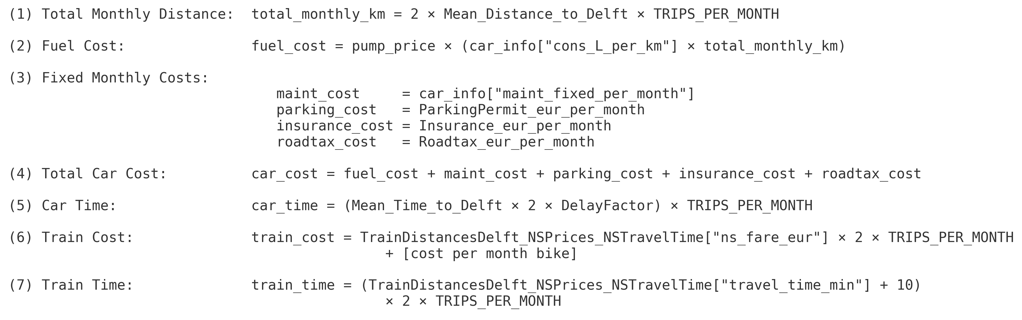








## 6. Results
Using the datasheets and formula's, the first results can be obtained for the train and the car. Some datasheets had to be processed further to find the information needed to create the correct graphs, such as the mean times and mean distances for the car.

### 6.1 Train results
The three figures presented below collectively illustrate the spatial and quantitative patterns of train commuting to and from Delft. The first figure shows that commuters from nearby cities such as The Hague and Rotterdam incur relatively low expenses (below €200 per month) Those travelling from distant regions, particularly in the north and south of the Netherlands, face costs exceeding €1,100 per month.

![Train Cost](figures\Train\cost_bars_month_peak.png)

The second figure shows the monthly travel time by city. Similarly, the results presented show a clear relationship between distance and total travel time. Commuters from nearby cities such as Rotterdam and The Hague spend less than 1,000 minutes per month traveling, whereas those from Groningen, Leeuwarden, and Maastricht exceed 5,700 minutes. Mid-distance cities, including Utrecht and Eindhoven, fall within an intermediate range of 2,000 to 3,000 minutes.

![Train Traveltime](figures\Train\time_bars_month_peak.png)

The third figure brings these observations together by jointly illustrating monthly train cost and travel time. A clear positive relationship emerges: cities with longer travel times also exhibit higher commuting costs. This correlation suggests that both cost and time increase proportionally with distance.

![Train Cost and Traveltime comparison](figures\Train\cost_month_vs_time_month_peak.png)

### 6.2 Car results
The three figures presented below collectively illustrate the spatial and quantitative patterns of car commuting to and from Delft. The first figure presents the estimated monthly car commuting costs per city for travel to and from Delft. Similar to the pattern observed for train travel, car costs increase substantially with distance. The lowest monthly expenses occur for nearby cities such as The Hague (€207) and Rotterdam (€222), while the highest costs are recorded for Maastricht (€844) and Groningen (€831). Mid-distance cities such as Eindhoven, Nijmegen, and Tilburg fall within a moderate cost range of approximately €500 to €700 per month.

![Car Cost](figures\Car\Monthly_car_cost_per_city.png)

The second figure presents the estimated total monthly car travel time per city for commuting to and from Delft. As expected, a strong relationship is observed between travel distance and total travel time, with commuters from nearby cities such as The Hague and Rotterdam spending less than 1,000 minutes per month on average, while those from Groningen, Leeuwarden, and Maastricht exceed 7,000 minutes.

These results indicate that car travel time increases sharply with distance, consistent with the expected effects of longer routes and urban congestion. The pattern also aligns closely with the previously observed trend for train travel times, although the relative differences between nearby and distant cities appear more pronounced in the case of car travel.

The distribution of travel time therefore highlights the growing inefficiency of long-distance car commuting, particularly for cities located in the northern and southern regions. This provides an important empirical basis for the subsequent comparison of travel efficiency between car and train modes.

![Car Traveltime](figures\Car\Monthly_traveltime_per_city.png)

The third figure combines the findings from the previous two charts by illustrating the relationship between monthly car travel time and associated commuting costs per city. The results reveal a clear positive correlation: cities with longer travel times also incur higher monthly costs. This pattern indicates that both cost and time increase proportionally with distance, reflecting the combined influence of fuel consumption, maintenance, and travel duration.

Nearby cities such as The Hague and Rotterdam exhibit both low travel times (below 1,000 minutes per month) and low costs (around €200 per month), highlighting the efficiency of short-distance car commuting. In contrast, long-distance cities such as Groningen, Leeuwarden, and Maastricht exceed 7,000 minutes of travel time and €800 in monthly expenses, illustrating the escalating burden of extended car travel. Mid-distance cities such as Utrecht, Tilburg, and Eindhoven occupy an intermediate position, consistent with their geographic proximity to Delft.

The observed relationship thus confirms that, for car travel, total commuting cost and travel time are strongly interdependent and primarily determined by distance. These results serve as a direct counterpart to the train analysis, enabling a subsequent comparison of cost and time efficiency between both modes.

![Car Cost and Traveltime comparison](figures\Car\Carcost_vs_cartime.png)

### 6.3 Comparison Train and Car
Having examined the travel cost and time characteristics of both transport modes separately, the following figures compare the car and train results to assess their relative efficiency for commuting to and from Delft. This comparison focuses on two key dimensions: financial cost and travel time, which together determine the economic and practical feasibility of each commuting option. By analysing differences in monthly cost and total travel duration per city, this section aims to identify under which conditions car travel or train travel provides a more advantageous alternative. The comparison thus forms the basis for evaluating whether commuting to Delft is generally cheaper or more comfortable by train or by private car.

The first figure directly compares the estimated monthly commuting costs of car and train travel for each city. Overall, a clear spatial pattern emerges in which train travel is more expensive than car travel for nearly all cities, particularly for long-distance connections such as Groningen, Leeuwarden, and Maastricht, where train costs exceed €1,000 per month compared to car costs of approximately €800. This indicates that the financial burden of train commuting increases more steeply with distance than that of car travel.

In contrast, for short-distance cities such as The Hague and Rotterdam, both modes exhibit relatively low monthly costs, though the car remains slightly more expensive when parking and fuel are considered. Mid-distance cities such as Utrecht, Tilburg, and Eindhoven fall within an intermediate range, where the cost difference between car and train narrows but still favours car travel.

These findings suggest that while both modes become costlier with increasing distance, the train imposes a higher monthly financial cost for most commuters. This provides an important economic perspective for evaluating the overall efficiency of car versus train travel to Delft.

![Cost comparison](figures\Comparison\cost_comparison.png)

The second figure compares the total monthly travel time by car and by train for commuters to and from Delft. Overall, the results indicate that train travel generally requires less time than car travel, particularly for long-distance commutes. For instance, commuters from Groningen, Leeuwarden, and Maastricht spend approximately 6,000–7,000 minutes per month by train compared with 7,000–8,000 minutes by car, highlighting the impact of congestion and reduced driving efficiency over longer routes.

In contrast, for short-distance cities such as The Hague and Rotterdam, both travel modes show similar total travel times of around 800–900 minutes per month, suggesting that car travel remains competitive for nearby connections. For mid-distance cities, including Utrecht, Tilburg, and Eindhoven, train travel offers a moderate time advantage, with car journeys generally taking several hundred minutes longer per month.

These results show that travel time increases with distance for both modes, but the rate of increase is steeper for car travel, reflecting the cumulative effect of congestion and route inefficiency. The comparison therefore suggests that, in terms of travel time, the train provides a more efficient mode of transport for medium- and long-distance commuters, while the car remains comparable for short-distance routes.

![Traveltime comparison](figures\Comparison\traveltime_comparison.png)

The third figure integrates the cost and time analyses for both transport modes, providing a comprehensive comparison of commuting efficiency to and from Delft. The plotted data show distinct yet related trends for car and train travel: both exhibit a positive correlation between monthly cost and total travel time, but with differing slopes. The train trend line rises more steeply, indicating that train costs increase disproportionately with distance, whereas the car trend line displays a more gradual incline.

The intersection point between both curves, located at approximately 930 minutes of monthly travel time and €220, represents the threshold at which car and train commuting become equally costly. Below this threshold—corresponding to nearby cities such as The Hague and Rotterdam—car travel remains the cheaper option. Beyond this point, train travel becomes increasingly expensive, though it generally offers shorter total travel times.

![Cost and Time comparison](figures\Comparison\car_vs_train_basecase.png)




### 6.3.1 Comparison tables: train vs car (monthly totals)
Below are two comparison tables. For each city a list of the monthly total travel time (minutes) and monthly cost (EUR) for train and car, and which modality is then recommended to choose. Ultimately the recommendation is based on the users preference for either time or cost efficiency.

**Train vs Car — Monthly travel time (minutes)**

| City | Train time (min / month) | Car time (min / month) | Recommendation |
|------|-------------------------:|-----------------------:|:--------------:|
| Amsterdam | 2772 | 2867 | choose train |
| Rotterdam | 828 | 923 | choose train |
| The Hague | 900 | 826 | choose car |
| Utrecht | 2376 | 2576 | choose train |
| Eindhoven | 3060 | 4957 | choose train |
| Tilburg | 2160 | 3694 | choose train |
| Almere | 3600 | 3402 | choose car |
| Groningen | 6840 | 8311 | choose train |
| Breda | 1620 | 2770 | choose train |
| Nijmegen | 4680 | 4957 | choose train |
| Leeuwarden | 6840 | 6950 | choose train |
| Maastricht | 5724 | 7436 | choose train |

**Train vs Car — Monthly cost (EUR)**

| City | Train cost (EUR / month) | Car cost (EUR / month) |
|------:|-------------------------:|---------------------:|
| Amsterdam | 597.54 | 357.77 |
| Rotterdam | 158.34 | 221.94 |
| The Hague | 129.54 | 207.12 |
| Utrecht | 575.94 | 372.74 |
| Eindhoven | 889.14 | 521.18 |
| Tilburg | 687.54 | 430.11 |
| Almere | 734.34 | 410.90 |
| Groningen | 1133.94 | 831.18 |
| Breda | 539.94 | 326.87 |
| Nijmegen | 971.94 | 517.73 |
| Leeuwarden | 1133.94 | 700.65 |
| Maastricht | 1133.94 | 844.30 |



### 6.4 Exploring different subscriptions

To further test the robustness of the results, two different train subscriptions were examined and compared with monthly car commuting costs. The goal is to understand whether a specific train subscription could make travelling by train more cost-effective than travelling by car.


#### 6.4.1 20% discount subscription during peak hours (Altijd Voordeel)

The first subscription gives a 20% discount on train fares during peak hours, for a fixed monthly fee of €28.50. In addition, a Swapfiets subscription (€17.90 per month) is included to cover the last-mile transport from the train station to work.

The figure below shows the monthly total cost for car use versus travelling by train with the 20% discount subscription option:


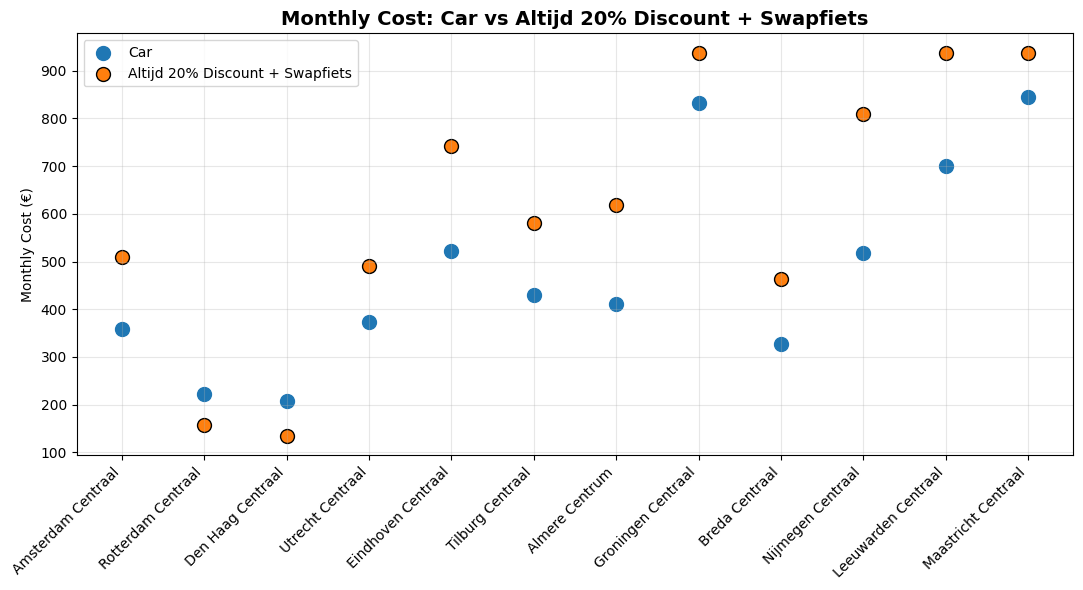


The chart shows that this subscription only leads to lower total commuting costs for the routes from **Rotterdam** and **Den Haag**. For all other cities, even with the discount applied, the total monthly train cost remains higher than travelling by car. This indicates that the 20% discount subscription does not sufficiently reduce the overall costs for medium- or long-distance commuting.


#### 6.4.2 Route-based subscription (Traject Vrij)

The second subscription type, Traject Vrij, offers unlimited travel on a fixed train route for a predetermined price. The total monthly cost shown below includes the Traject Vrij subscription plus the Swapfiets subscription (€17.90):

| City       | Costs [EUR] |
|------------|-----------|
| Amsterdam  | 388.70    |
| Rotterdam  | 112.50    |
| Den Haag   | 88.60     |
| Utrecht    | 382.10    |
| Eindhoven  | 393.60    |
| Tilburg    | 393.60    |
| Almere     | 393.60    |
| Groningen  | 393.60    |
| Breda      | 357.20    |
| Nijmegen   | 393.60    |
| Leeuwarden | 393.60    |
| Maastricht | 393.60    |

The corresponding cost comparison is shown in the figure below:


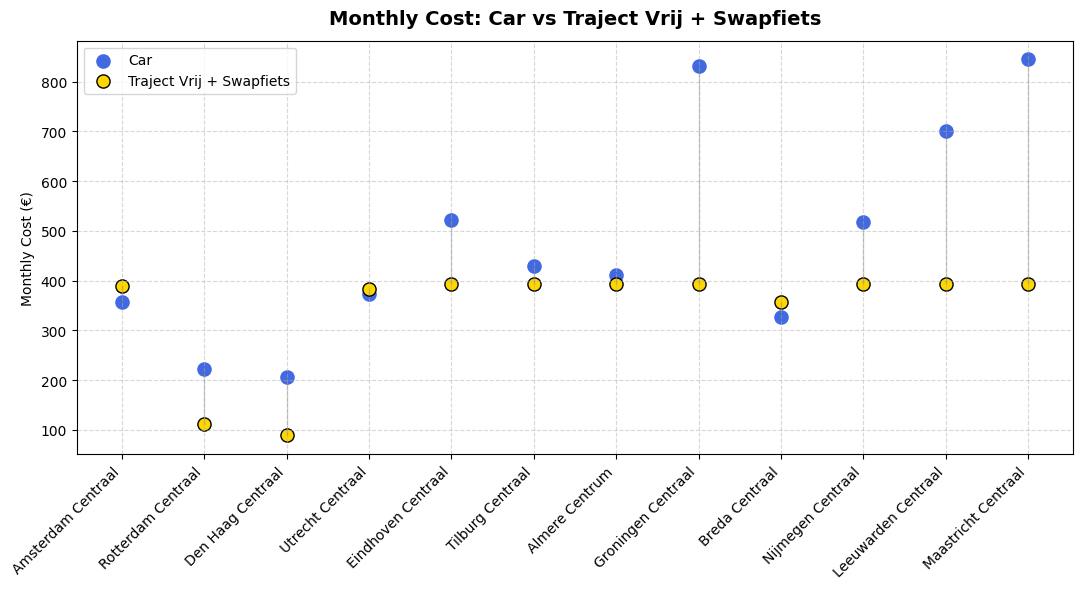


The Traject Vrij subscription has a much stronger effect on reducing total travel costs. Because this subscription provides a fixed price for unlimited travel on a specific route, the monthly cost becomes predictable and, in many cases, significantly lower than travelling by car. From the figure, the train becomes cheaper than the car for most cities when Traject Vrij is applied. Only a few routes, such as Amsterdam, Utrecht, and Breda, remain more cost-effective by car. In contrast, cities like Rotterdam and Den Haag show a substantial cost advantage when using Traject Vrij instead of driving.

In summary, the 20% discount subscription provides only limited financial benefit and rarely beats the cost of travelling by car. Traject Vrij, however, often results in a lower monthly cost than the car, particularly when commuting along fixed and frequently used routes. This makes Traject Vrij the more attractive option for regular commuters on a consistent route.



## 7. Conclusion

This study compared monthly commuting costs and travel time for car and train travel to Delft, using twelve major Dutch cities as reference points. The results reveal a clear trade-off between financial cost and travel time.

Car travel is generally the most cost-effective option for short commuting distances. Cities such as Rotterdam and The Hague show lower monthly costs when commuting by car, while offering travel times that are comparable to those of the train. However, as distance increases, car travel time rises sharply due to congestion and route inefficiencies. In contrast, train travel times remain relatively stable, making the train the faster option for medium- and long-distance commuting.

When paying full train fares, train commuting remains significantly more expensive than car use. Monthly expenses can easily exceed €1,000 depending on distance and travel frequency. However, the analysis of different subscription models shows that the cost structure of train commuting changes substantially when using a subscription. The 20% discount subscription (Altijd Voordeel) has only a limited impact: it rarely makes the train cheaper than the car. 

The route-based subscription (Traject Vrij), combined with a Swapfiets for the last-mile connection, produces a very different outcome. With fixed monthly costs of approximately €393.60 for most routes, the train becomes cheaper than the car for the majority of cities analyzed. Only a few cities, such as Amsterdam, Utrecht, and Breda, remain more cost-efficient by car. This makes Traject Vrij particularly attractive for commuters who consistently travel on the same route. This is a viable option for a student that commutes to its lectures most of the days. For students commuting to university less consistent, this subscription might be less attractive, as in periods when the student does not have lectures often, they still pay the fixed fare. 

For students commuting from Amsterdam, Utrecht, and Breda, travelling by car remains the cheapest option under all scenarios. Even when applying the different train subscriptions, including the 20% discount subscription and the Traject Vrij route-based subscription, train costs still exceed the monthly car expenses for these cities. Therefore, for these specific routes, driving continues to be the most financially attractive choice.

In conclusion, car travel remains financially favorable for short distances, while train travel becomes more time-efficient and, with the Traject Vrij subscription, often more cost-effective for longer and fixed commuting routes. The best option therefore depends on commuting distance and predictability: occasional or short-distance commuters benefit from driving, whereas regular long-distance commuters can achieve both time savings and cost stability by using the train with a route-based subscription.


## 8. Discussion and limitations

Further research should focus on refining several key aspects of the analysis. First, the first- and last-mile connections should be examined in more detail, taking into account the specific characteristics, public transport availability, and cycling infrastructure of different neighborhoods within each city. This would provide a more realistic representation of total travel time and accessibility.

Additionally, more accurate congestion and delay factors for both car and train travel should be included. Real-time traffic patterns, seasonal variations, and peak-hour disruptions can significantly affect travel duration and cost. Integrating these into the model would improve the reliability of the comparison.

Future studies should also explore the monthly budget constraints and maximum acceptable travel time of students. Understanding how much students are willing and able to spend on commuting, and how much travel time they perceive as acceptable, will help determine the feasibility of different commuting modes. Including subjective factors such as stress, comfort, productivity while travelling, and weather dependency could also improve the analysis.

Finally, the results show that subscription type has a major impact on commuting costs. A more advanced model could compare additional subscription options and incorporate non-financial benefits such as sustainability, CO₂ emissions, and travel flexibility.






## 9. Contribution statement

As a group, we collectively defined the overall research structure, including which data needed to be collected, how the comparison between car and train travel should be performed, and which research questions were relevant. We also jointly determined the scope and limitations of the study and set the boundaries for what would and would not be included in the analysis.

- Julian van Heijningen: Checking the code, responsible for the API
- Georgios Kosmidis: Writing code, making charts, writing the report, checking code
- Tristan Roussou: Writing code, making charts, writing the report
- Mairah Tirtamenawi: Writing code, making charts, writing the report
- Michiel de Veld: Making charts, writing the report, checking the report and code,


### AI Statement
AI tools were used while writing this report to assist with language editing and structure. AI use was also applied to help format our code to be PEP8 compliant in order to imprive readibility and consistency. The ideas, analysis and conclusions presented are our own and were formed through our engagement with lecture materials and group discussions. AI use was limited to improving clarity, grammar and cohesion and did not determine the content or outcomes of the report. All final decisions reflect our own reasoning and judgement.